**РК1 по курсу "Методы машинного обучения"**

Шатала Давид, ИУ5И-26М

Код работы

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('car.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cols_filter = ['car_ID', 'CarName', 'fueltype', 'doornumber', 'carbody', 'drivewheel', 'horsepower', 'price']
data = data[cols_filter]
data.head()

,car_ID,CarName,fueltype,doornumber,carbody,drivewheel,horsepower,price
0,1,alfa-romero giulia,gas,two,convertible,rwd,111,13495.0
1,2,alfa-romero stelvio,gas,two,convertible,rwd,111,16500.0
2,3,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,154,16500.0
3,4,audi 100 ls,gas,four,sedan,fwd,102,13950.0
4,5,audi 100ls,gas,four,sedan,4wd,115,17450.0


<Axes: xlabel='horsepower'>

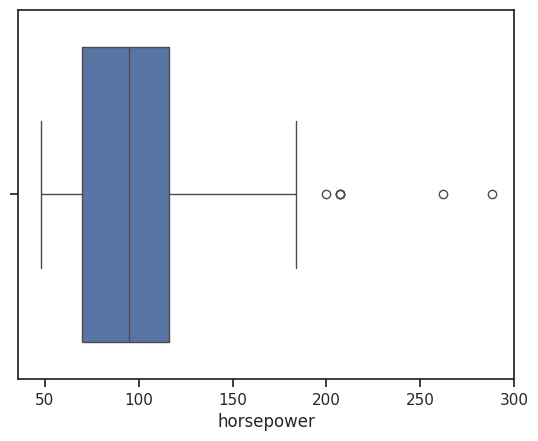

In [5]:
sns.boxplot(x=data['horsepower'])

In [6]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [7]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [8]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data['carbody'])

In [9]:
data_COUNT_ENC

,carbody
0,6
1,6
2,70
3,96
4,96
...,...
200,96
201,96
202,96
203,96


In [10]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [11]:
data_COUNT_ENC['carbody'].unique()

array([ 6, 70, 96, 25,  8])

In [12]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data['carbody'])
data_FREQ_ENC

,carbody
0,0.029268
1,0.029268
2,0.341463
3,0.468293
4,0.468293
...,...
200,0.468293
201,0.468293
202,0.468293
203,0.468293


In [13]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [14]:
data_FREQ_ENC['carbody'].unique()

array([0.02926829, 0.34146341, 0.46829268, 0.12195122, 0.03902439])

In [15]:
from sklearn.preprocessing import RobustScaler

<Axes: title={'center': 'Horsepower Frequency Scaled'}, ylabel='Frequency'>

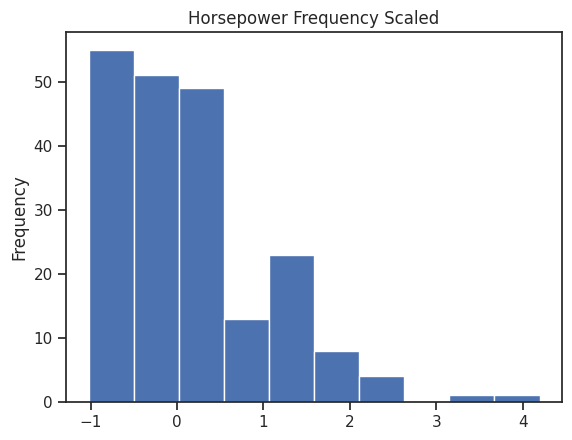

In [16]:
sc = RobustScaler()
data_sc = pd.Series(sc.fit_transform(data[['horsepower']]).reshape(1,-1)[0])
data_sc.plot.hist(title='Horsepower Frequency Scaled')

In [17]:
data_sc.median()

0.0